In [2]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [4]:
X_train=np.loadtxt('input.csv',delimiter=',')
X_test=np.loadtxt('input_test.csv',delimiter=',')

y_train=np.loadtxt('labels.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [6]:
print(X_train.shape,X_test.shape)
print(y_test.shape,y_train.shape)

(2000, 30000) (400, 30000)
(400,) (2000,)


In [14]:
X_train=X_train.reshape(len(X_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)



In [15]:
X_test=X_test.reshape(len(X_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [16]:
print(X_train.shape,X_test.shape)
print(y_test.shape,y_train.shape)

(2000, 100, 100, 3) (400, 100, 100, 3)
(400, 1) (2000, 1)


In [17]:
X_train

array([[[[ 37.,  39.,  25.],
         [ 26.,  24.,   9.],
         [ 34.,  25.,  10.],
         ...,
         [ 57.,  44.,  35.],
         [ 61.,  47.,  38.],
         [ 65.,  51.,  42.]],

        [[ 45.,  43.,  28.],
         [ 28.,  25.,   8.],
         [ 52.,  40.,  24.],
         ...,
         [ 54.,  41.,  32.],
         [ 57.,  43.,  34.],
         [ 61.,  47.,  38.]],

        [[ 52.,  45.,  26.],
         [ 32.,  24.,   5.],
         [ 69.,  54.,  35.],
         ...,
         [ 54.,  40.,  29.],
         [ 56.,  42.,  31.],
         [ 59.,  45.,  34.]],

        ...,

        [[ 20.,  39.,   0.],
         [101., 125.,  67.],
         [152., 182., 120.],
         ...,
         [ 46.,  41.,  19.],
         [ 60.,  55.,  33.],
         [ 60.,  55.,  33.]],

        [[ 46.,  65.,   9.],
         [116., 140.,  82.],
         [156., 186., 124.],
         ...,
         [ 64.,  60.,  35.],
         [ 75.,  71.,  46.],
         [ 72.,  68.,  43.]],

        [[ 81., 100.,  44.],
       

In [18]:
X_train=X_train/255
X_test=X_test/255

In [19]:
import matplotlib.pyplot as plt
import random 

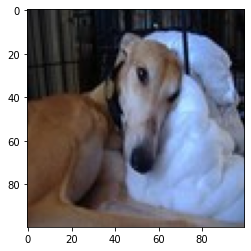

In [20]:
index=random.randint(0,len(X_train))
plt.imshow(X_train[index])

# MODELS

In [22]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPool2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
model.fit(X_train,y_train,validation_data=(),epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 9s 266ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 2/5
32/32 [==============================] - 14s 447ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 18s 553ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 14s 428ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 14s 451ms/step - loss: 0.0016 - accuracy: 1.0000


In [43]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

In [44]:
losses.head()

,loss,accuracy
0,0.006972,1.0
1,0.003895,1.0
2,0.002733,1.0
3,0.002065,1.0
4,0.001626,1.0


<AxesSubplot:>

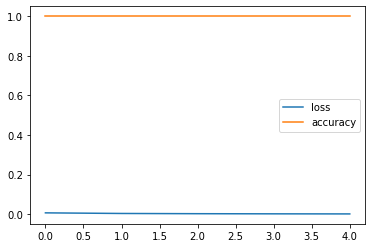

In [45]:
losses.plot()

1/1 [==============================] - 0s 42ms/step
[[1.]]
cat


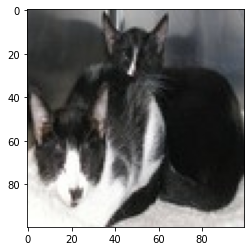

In [48]:
index=random.randint(0,len(y_test))
plt.imshow(X_test[index])

y_pred=model.predict(X_test[index].reshape(1,100,100,3))
print(y_pred)


if y_pred<0.5:
    print("dog")
else:
    print("cat")